# Tutorial 2: Packing categorization of PAH data

This tutorial discusses how to categorize the crystal packings for the PAH crystals.
The dataset was from the seminal work by [Desaraju and Gavezotti](https://doi.org/10.1107/S0108768189003794)

Created by Qiang Zhu (2022/08/10)

Last updated: 2022/08/10

In [1]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from pyxtal.db import database

# Clustering anlysis

There are two inputs 
- PAH.csv: a list of CSD codes
- PHA.txt: a 30*30 distance matrix

The files can be obtained by executing `run.py` from the current directory

```
python run.py
```

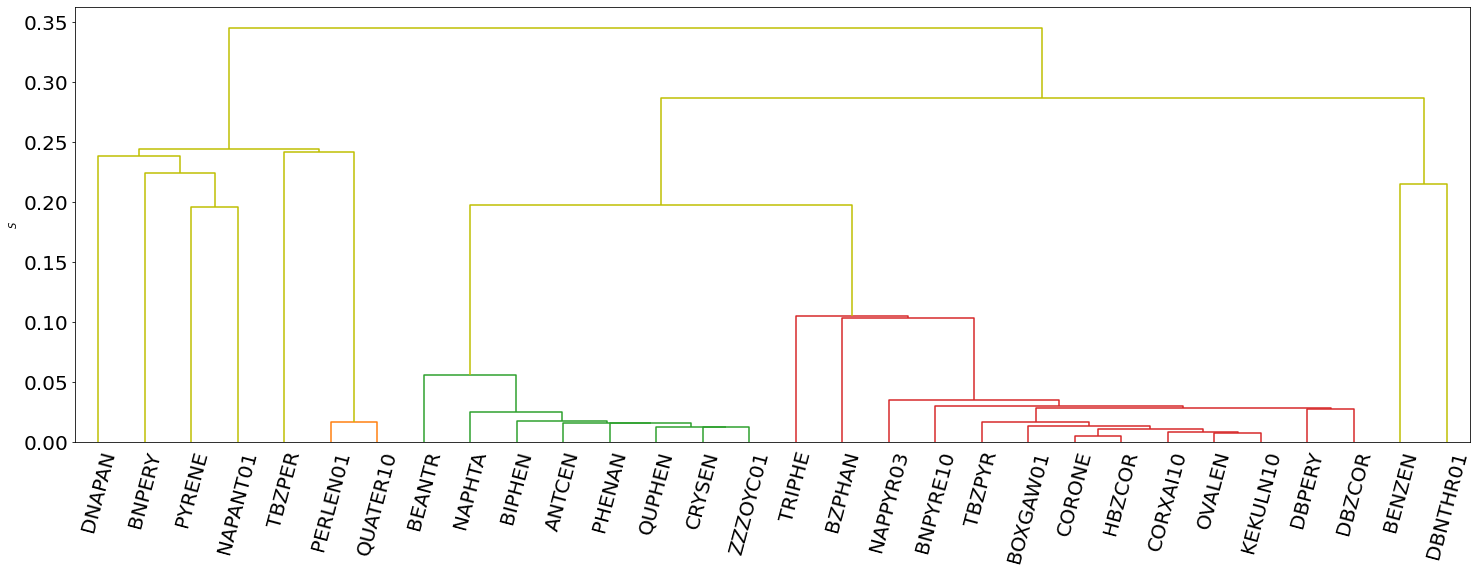

In [2]:
d = pd.read_csv('PAH.csv')
v = 1-np.loadtxt('PAH.txt')
dists = v[np.triu_indices(v.shape[0], k = 1)]
Z = linkage(dists)

fig = plt.figure(figsize=(25, 8))
dn = dendrogram(Z, 
                labels=list(d['Code']), 
                color_threshold=0.15, 
                above_threshold_color='y',
                show_leaf_counts=True,
                leaf_font_size=20, 
                leaf_rotation=75, 
                show_contracted=True,
                )
ax = plt.gca()
ax.set_ylabel('$S$')
ax.tick_params(axis='y', labelsize=20)
ax.grid(False)
plt.show()

# Visual analysis

From the above clustering, we can clearly find some crystals are more similar than others.
In the below, we can simply select two structures and look at the spherica images and real crystal packing.
Here we choose `PERLEN01` and `QUATER10`. You are welcome to try other pairs.

In [3]:
db = database('../dataset/hydrocarbon.db')

code1, code2 = 'PERLEN01', 'QUATER10'
xtal1 = db.get_pyxtal(code1)
sph1 = xtal1.get_spherical_images()

xtal2 = db.get_pyxtal(code2)
sph2 = xtal2.get_spherical_images()

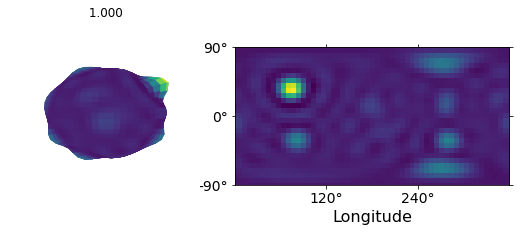

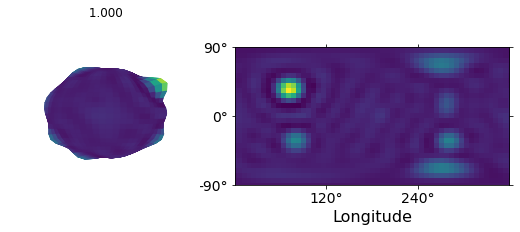

In [4]:
sph1.plot_sph_images() #molecule=True)
sph2.plot_sph_images() #molecule=True)

In [5]:
xtal1.show(size=(400, 200))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [6]:
xtal2.show(size=(400, 200))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol